## Predict survival of Titanic passengers (1) - Data exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
data = pd.read_csv("train.csv")

### Exploratory data analysis of training set

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
for column in data.select_dtypes(exclude=[np.number]).columns.tolist():
    print("{}: {} unique values".format(column, data[column].nunique()))  

Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


#### Approach:
- Ticket, Fare and Passenger Id will be excluded from analysis. Ticket and Fare has no direct impact on survival likelihood at the time of the disaster. They would impact class and cabin location; they might also reflect the point of embarkation, age of the passenger, or whether the passenger was travelling in a group (e.g. a purchase for multiple tickets could be reflected as higher ticket cost under one person's name). Such information could be important predictors of survival and are provided by the other columns. 
- Categorical variables such as 'Survived'and 'Pclass' to be converted to object dtypes
- Further analysis on 'Name' and 'Cabin' to be done to explore if other useful info can be extracted
- Process 'Age' and 'Embarked' columns to replace NAs with suitable values
- Exploratory data viz to observe prelim patterns between variables to assess if additional features can be engineered


In [18]:
for column in ['Survived', 'Pclass']:
    data[column] = data[column].astype('str')

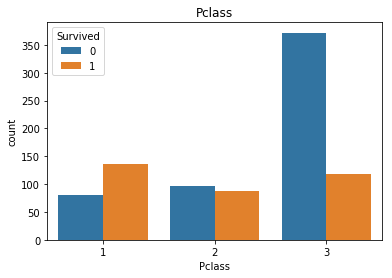

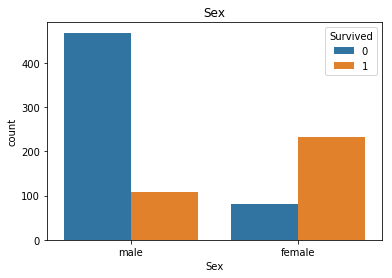

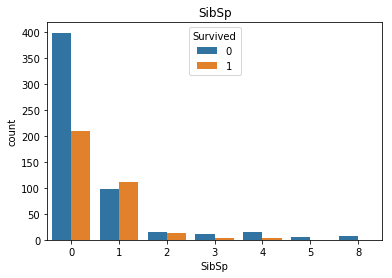

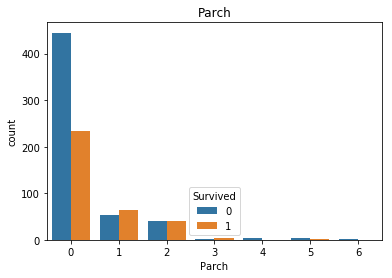

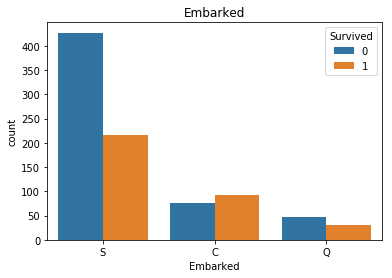

In [24]:
cols = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']
for col in cols:
    plt.figure()
    sns.countplot(x=col, data = data, hue="Survived")
    plt.title(col)

In [25]:
data.groupby(["SibSp","Parch"])['Survived'].value_counts()

SibSp  Parch  Survived
0      0      0           374
              1           163
       1      1            25
              0            13
       2      1            21
              0             8
       3      1             1
       4      0             1
       5      0             2
1      0      1            64
              0            59
       1      1            34
              0            23
       2      1            12
              0             7
       3      0             2
              1             1
       4      0             3
       5      0             2
              1             1
       6      0             1
2      0      0            12
              1             4
       1      1             6
              0             1
       2      0             2
              1             2
       3      1             1
3      0      1             2
       1      0             7
       2      0             5
              1             2
4      1      0  

Survival rate of passengers with zero SibSp/Parch markedly lower compared to others with relatives - create a new column to indicate whether passenger has SibSp/Parch on board

'Embarked', 'Pclass' and 'Sex' appear to influence survival rates

In [28]:
data["HasSibSp"] = 1
data["HasParch"] = 1
data.loc[data["SibSp"]==0,"HasSibSp"]=0
data.loc[data["Parch"]==0,"HasParch"]=0
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasSibSp,HasParch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


/anaconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


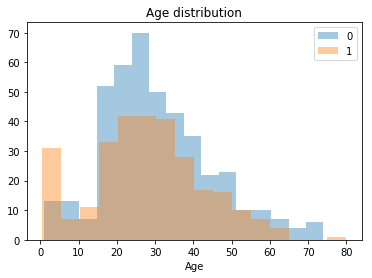

In [26]:
for status in data["Survived"].unique():
    df = data[data["Survived"]==status]
    sns.distplot(df["Age"][~df["Age"].isna()], kde=False, label = str(status))
    plt.title("Age distribution")
    plt.legend()

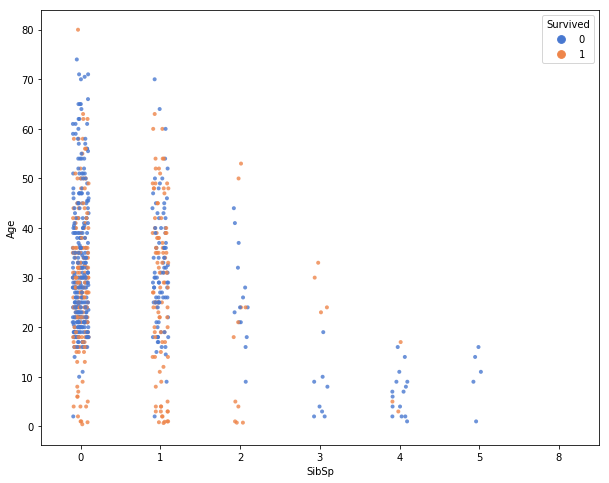

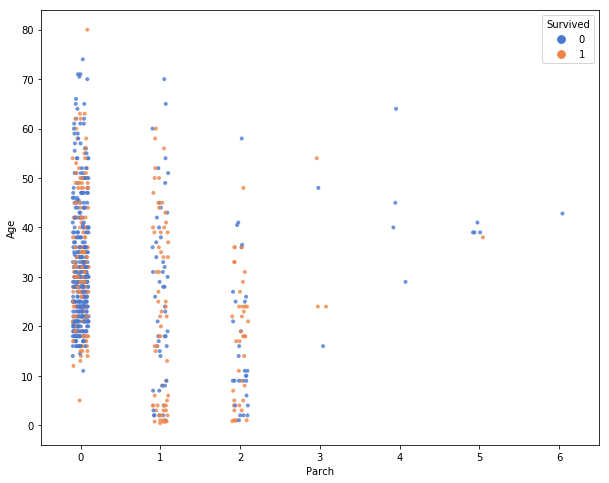

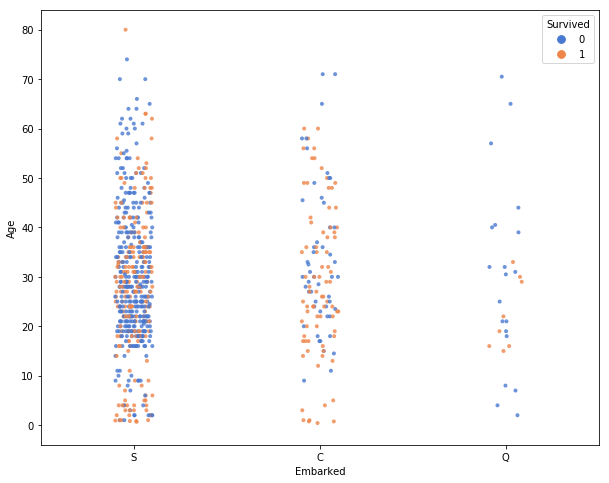

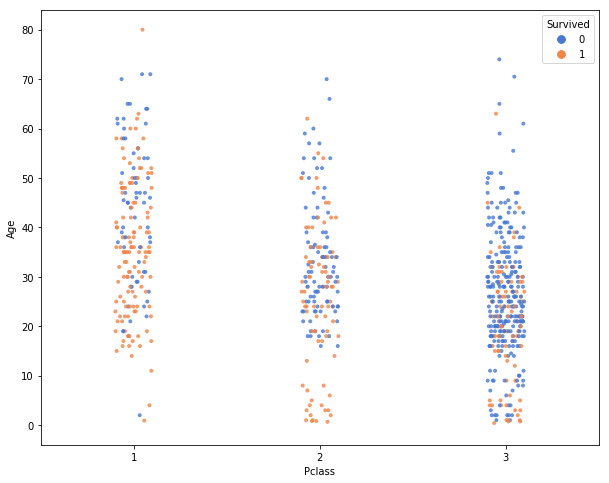

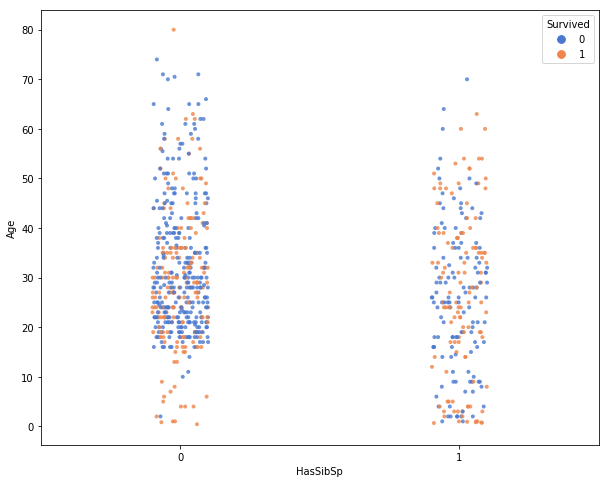

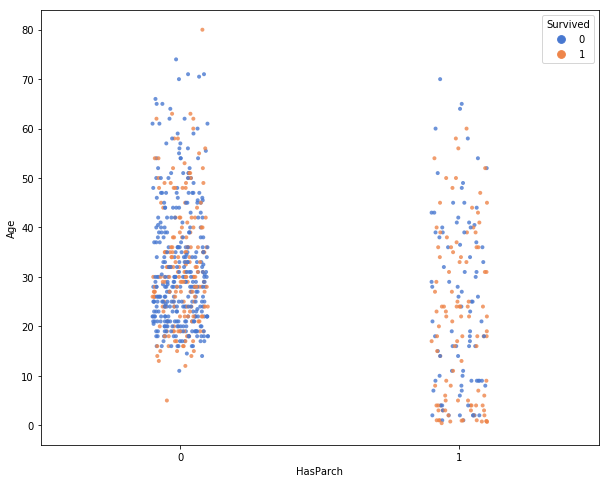

In [55]:
for col in ['SibSp','Parch','Embarked', 'Pclass', 'HasSibSp','HasParch']:
    plt.figure(figsize = (10,8))
    sns.stripplot(x=col,y="Age", hue="Survived", data=data, jitter=True,size = 4,alpha = 0.8, palette = 'muted')

Titles associated with names may give an indication of age. In the early 1900s, "Master" was used to address males less than 18 years of age. We would also expect titles such as "Dr", "Col" and "Sir" to refer to more mature passengers.

Titles could be extracted from the "Name" column to assess the age distribution for each title. Missing NA values will be filled based on the age distribution for the respective title.

In [57]:
data['title'] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()) #extract titles from names
data['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
Lady              1
Capt              1
Mme               1
Ms                1
the Countess      1
Jonkheer          1
Sir               1
Name: title, dtype: int64

In [76]:
top_titles = data['title'].value_counts()[0:5].index.tolist() #get most common titles

In [77]:
data.groupby('title').describe() #distribution of age by title

Age                                                          \
              count       mean        std    min     25%   50%    75%   max   
title                                                                         
Capt            1.0  70.000000        NaN  70.00  70.000  70.0  70.00  70.0   
Col             2.0  58.000000   2.828427  56.00  57.000  58.0  59.00  60.0   
Don             1.0  40.000000        NaN  40.00  40.000  40.0  40.00  40.0   
Dr              6.0  42.000000  12.016655  23.00  35.000  46.5  49.75  54.0   
Jonkheer        1.0  38.000000        NaN  38.00  38.000  38.0  38.00  38.0   
Lady            1.0  48.000000        NaN  48.00  48.000  48.0  48.00  48.0   
Major           2.0  48.500000   4.949747  45.00  46.750  48.5  50.25  52.0   
Master         36.0   4.574167   3.619872   0.42   1.000   3.5   8.00  12.0   
Miss          146.0  21.773973  12.990292   0.75  14.125  21.0  30.00  63.0   
Mlle            2.0  24.000000   0.000000  24.00  24.000  24.0  24.00  24.0   
Mme             1.0  24.000000        NaN  24.00  24.000  24.0  24.00  24.0   
Mr            398.0  32.368090  12.708793  11.00  23.000  30.0  39.00  80.0   
Mrs           108.0  35.898148  11.433628  14.00  27.750  35.0  44.00  63.0   
Ms              1.0  28.000000        NaN  28.00  28.000  28.0  28.00  28.0   
Rev             6.0  43.166667  13.136463  27.00  31.500  46.5  53.25  57.0   
Sir             1.0  49.000000        NaN  49.00  49.000  49.0  49.00  49.0   
the Countess    1.0  33.000000        NaN  33.00  33.000  33.0  33.00  33.0   

               Fare            ...  PassengerId         SibSp            \
              count       mean ...          75%    max  count      mean   
title                          ...                                        
Capt            1.0  71.000000 ...       746.00  746.0    1.0  1.000000   
Col             2.0  31.025000 ...       683.25  695.0    2.0  0.000000   
Don             1.0  27.720800 ...        31.00   31.0    1.0  0.000000   
Dr              7.0  49.168457 ...       714.00  797.0    7.0  0.571429   
Jonkheer        1.0   0.000000 ...       823.00  823.0    1.0  0.000000   
Lady            1.0  39.600000 ...       557.00  557.0    1.0  1.000000   
Major           2.0  28.525000 ...       515.25  537.0    2.0  0.000000   
Master         40.0  34.703125 ...       764.00  870.0   40.0  2.300000   
Miss          182.0  43.797873 ...       612.25  889.0  182.0  0.714286   
Mlle            2.0  59.402100 ...       693.75  711.0    2.0  0.000000   
Mme             1.0  69.300000 ...       370.00  370.0    1.0  0.000000   
Mr            517.0  24.441560 ...       674.00  891.0  517.0  0.288201   
Mrs           125.0  45.138533 ...       679.00  886.0  125.0  0.696000   
Ms              1.0  13.000000 ...       444.00  444.0    1.0  0.000000   
Rev             6.0  18.312500 ...       793.50  887.0    6.0  0.166667   
Sir             1.0  56.929200 ...       600.00  600.0    1.0  1.000000   
the Countess    1.0  86.500000 ...       760.00  760.0    1.0  0.000000   

                                                 
                   std  min  25%  50%  75%  max  
title                                            
Capt               NaN  1.0  1.0  1.0  1.0  1.0  
Col           0.000000  0.0  0.0  0.0  0.0  0.0  
Don                NaN  0.0  0.0  0.0  0.0  0.0  
Dr            0.975900  0.0  0.0  0.0  1.0  2.0  
Jonkheer           NaN  0.0  0.0  0.0  0.0  0.0  
Lady               NaN  1.0  1.0  1.0  1.0  1.0  
Major         0.000000  0.0  0.0  0.0  0.0  0.0  
Master        1.910833  0.0  1.0  1.0  4.0  8.0  
Miss          1.431961  0.0  0.0  0.0  1.0  8.0  
Mlle          0.000000  0.0  0.0  0.0  0.0  0.0  
Mme                NaN  0.0  0.0  0.0  0.0  0.0  
Mr            0.821298  0.0  0.0  0.0  0.0  8.0  
Mrs           0.598708  0.0  0.0  1.0  1.0  3.0  
Ms                 NaN  0.0  0.0  0.0  0.0  0.0  
Rev           0.408248  0.0  0.0  0.0  0.0  1.0  
Sir                NaN  1.0  1.0  

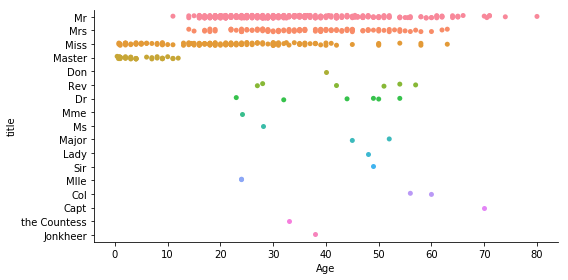

In [73]:
def age_spread(df):
    sns.catplot(x="Age", y="title", data=df, height=4, aspect=2)
    
age_spread(data)

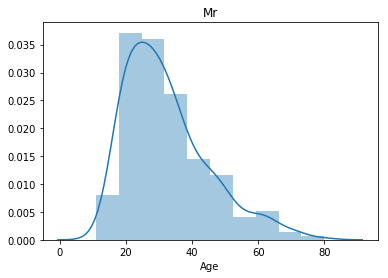

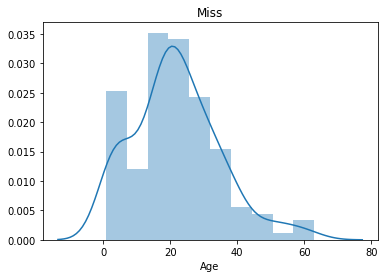

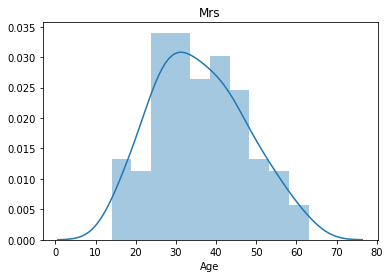

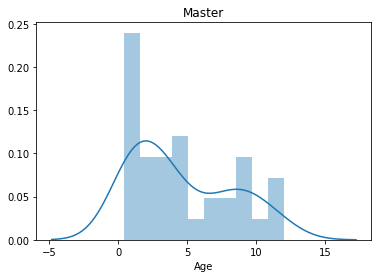

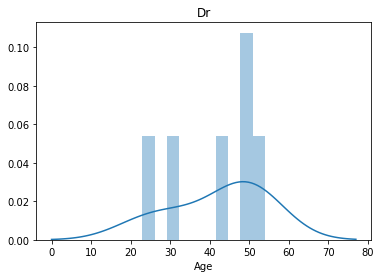

In [78]:
def age_hist(df):
    for title in top_titles: #visualize age distribution of titles
        sns.distplot(df['Age'][df['title']==title].dropna(), bins = 10)
        plt.title(title)
        plt.show()
age_hist(data)

In [97]:
data.groupby('title')['Age'].apply(lambda x: x.isna().value_counts()) #number of NA values in Age column for each title

title              
Capt          False      1
Col           False      2
Don           False      1
Dr            False      6
              True       1
Jonkheer      False      1
Lady          False      1
Major         False      2
Master        False     36
              True       4
Miss          False    146
              True      36
Mlle          False      2
Mme           False      1
Mr            False    398
              True     119
Mrs           False    108
              True      17
Ms            False      1
Rev           False      6
Sir           False      1
the Countess  False      1
Name: Age, dtype: int64

In [98]:
age_medians = {} #create dictionary of medians for each title using training set
for title in np.unique(data['title']):
    age_medians[title] = data['Age'][data['title']==title].median()

age_medians['overall'] = data['Age'].median() #create an overall median age value for the case where test set contains observations with new titles

def fill_age(df): #filling age NAs based with median age based on title, else with overall median age
    title = df['title'].unique().item()
    if title in age_medians.keys():
        df['Age'] = df['Age'].fillna(age_medians[title])
    else:
        df['Age'] = df['Age'].fillna(age_medians['overall'])
    return df

data = data.groupby('title').apply(lambda x: fill_age(x))

"Cabin" could indicate passenger location on the ship and therefore access to escape routes/lifeboats etc. This could be an important predictor of survival. Each cabin number begins with an alphabet which correlates to the deck number. Deck numbers will be extracted from the "Cabin" number as a new feature, which could be a more useful predictor (with only 8 unique classes) than using the "Cabin" numbers directly(147 unique values)

In [100]:
data['Cabin'].value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
F2                 3
C22 C26            3
D                  3
E101               3
F33                3
E25                2
E67                2
B5                 2
E44                2
C125               2
B22                2
B57 B59 B63 B66    2
E121               2
B49                2
C92                2
B58 B60            2
C126               2
D20                2
D17                2
F G73              2
D36                2
C68                2
D33                2
B28                2
B77                2
F4                 2
E24                2
                  ..
D9                 1
E50                1
A5                 1
B19                1
B102               1
C111               1
A10                1
C7                 1
C46                1
A32                1
C49                1
D45                1
C85                1
E58                1
B50                1
E17                1
C82          

In [101]:
def preproc_cabin(df):
    
    #extract Cabin Deck and Number
    df['Cabin_Deck']= np.NaN
    df['Cabin_Number']=np.NaN
    df['Cabin_Deck'][~df['Cabin'].isna()]  = df['Cabin'][~df['Cabin'].isna()].apply(lambda x:x[0])
    df['Cabin_Number'][~df['Cabin'].isna()]  = df['Cabin'][~df['Cabin'].isna()].apply(lambda x:x[1:].split(' ')[0]) #retain only first booth number if entries have multiple booths
    
    return df

data = preproc_cabin(data)

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


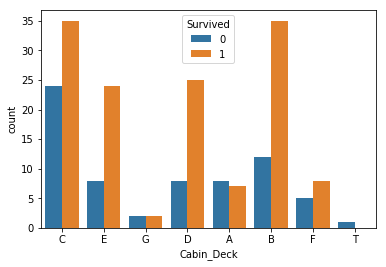

In [103]:
sns.countplot("Cabin_Deck", data=data, hue='Survived')

### To summarize, data will be preprocessed before model training:
- Extract 'title' from 'Name'
- Fill NA values in 'Age' with median age for the corresponding 'title'. For new 'title' not seen in training set, use overall median age
- Extract 'Cabin_Deck' from 'Cabin' (May want to exclude this eventually as too may NAs)
- Variables such as 'Cabin_Number', 'title', 'Fare', 'Ticket'  and 'Name' will be excluded due to too many missing values or irrelevance
- Additional categorical columns of whether passenger had any SibSp or Parch will be created
- Fill missing NA values in "Embarked" with mode
